<a href="https://colab.research.google.com/github/meerilahi/algoTrading/blob/main/new_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing and Importing Libraries**

In [2]:
!pip install alpha_vantage

In [83]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

**Fetching Data**

In [4]:
API_KEY = "XM0ZE0M05HEDFVTP"
ts = TimeSeries(key = API_KEY, output_format = 'pandas')
data = ts.get_daily(symbol = 'MSFT', outputsize = 'full')[0]

**Preparing Data**

In [60]:
df = data.iloc[:,3:4]
df.columns = ["Close"]
df.index.rename("Date", inplace = True)
df = df[::-1]
for i in range(1,6):
  df[f'L{i}'] = df['Close'].shift(i)
df.dropna(inplace = True)

**Visualizing Data**

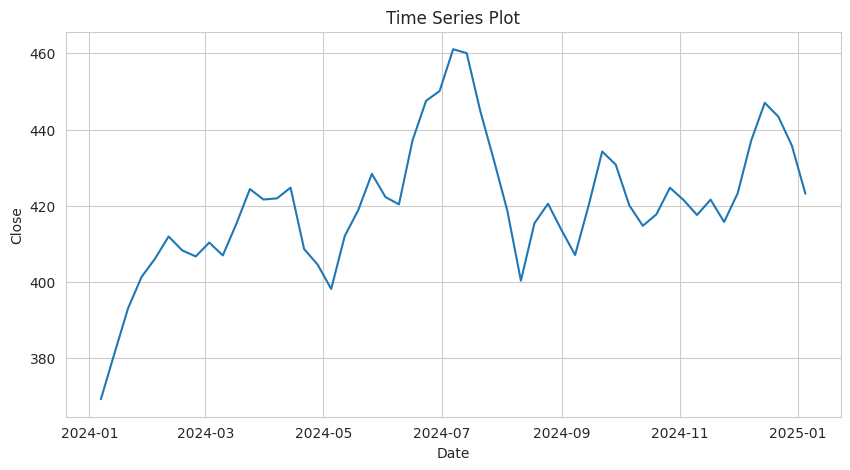

In [102]:
temp = df.loc["2024-01-01":"2025-01-01"].resample("W").mean()
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.lineplot(x=temp.index, y=temp["Close"], marker=None)
plt.title("Time Series Plot")
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()